<a href="https://colab.research.google.com/github/meenuraji/S9/blob/master/Copy_of_QuizS9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 20:23:32.809685


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True)

Files already downloaded and verified


In [0]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-vietmljc
All libraries are successfully installed!


In [0]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
n = 0
s = np.zeros(3)
sq = np.zeros(3)
for data, l in tqdm_notebook(train):
  x = np.array(data)/255
  s += x.sum(axis=(0,1))
  sq += np.sum(np.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = np.sqrt((sq/n - np.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



[0.49139968 0.48215841 0.44653091] [0.30249857 0.29176174 0.26781806] [0.24703223 0.24348513 0.26158784] 51200000


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA4')

In [0]:
import numpy as np
from eva4datatransforms import AlbumentationTransforms
import albumentations as A

channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
# Train Phase transformations

train_transforms = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=4) # fillvalue is 0 after normalizing as mean is 0
                                       ])

fillmeans = (np.array(channel_means)).astype(np.uint8)



# Test Phase transformations
test_transforms = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])

In [0]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import eva4dataloaders

dataloader = eva4dataloaders.DataLoader()

# train dataloader
train_loader = dataloader.load(train)

# test dataloader
test_loader = dataloader.load(test)

In [0]:
import numpy as np
dataiter = iter(train_loader)
images, labels = dataiter.next()
i = images[90].numpy()
print(np.max(i), np.min(i))

2.1267893 -1.9415886


torch.Size([128, 3, 32, 32])
torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

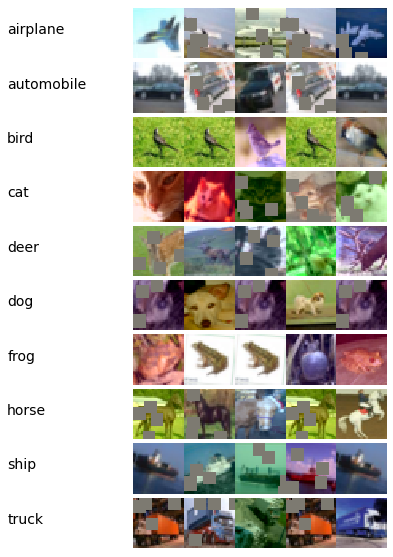

In [0]:
from __future__ import print_function

def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [0]:
import quizdnn 
import torch

model = quizdnn.QuizDNN()
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
model.summary((3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
         MaxPool2d-8           [-1, 64, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]           8,192
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

In [0]:
#from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
EPOCHS = 20
L2lambda = 0
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True, weight_decay=L2lambda)
#scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=EPOCHS)
L1lambda = 0
model.gotrain(optimizer, train_loader, test_loader, EPOCHS, "/content/drive/My Drive", scheduler, True, L1lambda)


Validation loss decreased (100000.000000 --> 1.379153).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0128, Accuracy: 40.25%; Test set: Average loss: 1.3792, Accuracy: 49.49%
Learning Rate = 0.010436



Validation loss decreased (1.379153 --> 1.241840).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0095, Accuracy: 56.96%; Test set: Average loss: 1.2418, Accuracy: 57.76%
Learning Rate = 0.028019



Validation loss decreased (1.241840 --> 1.037861).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0081, Accuracy: 63.60%; Test set: Average loss: 1.0379, Accuracy: 65.42%
Learning Rate = 0.052032



Validation loss decreased (1.037861 --> 0.885349).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0072, Accuracy: 67.84%; Test set: Average loss: 0.8853, Accuracy: 70.10%
Learning Rate = 0.076037



Validation loss decreased (0.885349 --> 0.755284).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0065, Accuracy: 71.64%; Test set: Average loss: 0.7553, Accuracy: 74.89%
Learning Rate = 0.093596



Validation loss decreased (0.755284 --> 0.728643).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0058, Accuracy: 74.26%; Test set: Average loss: 0.7286, Accuracy: 75.29%
Learning Rate = 0.100000



Validation loss decreased (0.728643 --> 0.572769).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0053, Accuracy: 76.36%; Test set: Average loss: 0.5728, Accuracy: 80.68%
Learning Rate = 0.098740



Validation loss decreased (0.572769 --> 0.541627).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0049, Accuracy: 78.63%; Test set: Average loss: 0.5416, Accuracy: 82.16%
Learning Rate = 0.095036



Validation loss decreased (0.541627 --> 0.488072).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0046, Accuracy: 79.85%; Test set: Average loss: 0.4881, Accuracy: 82.88%
Learning Rate = 0.089074



Epoch: 10, Train set: Average loss: 0.0043, Accuracy: 81.04%; Test set: Average loss: 0.5699, Accuracy: 81.55%
Learning Rate = 0.081152



Validation loss decreased (0.488072 --> 0.425877).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0040, Accuracy: 82.15%; Test set: Average loss: 0.4259, Accuracy: 85.40%
Learning Rate = 0.071668



Validation loss decreased (0.425877 --> 0.420611).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0038, Accuracy: 83.37%; Test set: Average loss: 0.4206, Accuracy: 85.49%
Learning Rate = 0.061098



Epoch: 13, Train set: Average loss: 0.0036, Accuracy: 84.17%; Test set: Average loss: 0.4924, Accuracy: 84.32%
Learning Rate = 0.049972



Validation loss decreased (0.420611 --> 0.389191).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0033, Accuracy: 85.35%; Test set: Average loss: 0.3892, Accuracy: 86.93%
Learning Rate = 0.038846



Validation loss decreased (0.389191 --> 0.355946).  Saving model ...
Epoch: 15, Train set: Average loss: 0.0031, Accuracy: 86.47%; Test set: Average loss: 0.3559, Accuracy: 88.27%
Learning Rate = 0.028280



Validation loss decreased (0.355946 --> 0.335004).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0029, Accuracy: 87.10%; Test set: Average loss: 0.3350, Accuracy: 88.82%
Learning Rate = 0.018803



Validation loss decreased (0.335004 --> 0.320735).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0026, Accuracy: 88.26%; Test set: Average loss: 0.3207, Accuracy: 89.62%
Learning Rate = 0.010891



Validation loss decreased (0.320735 --> 0.298838).  Saving model ...
Epoch: 18, Train set: Average loss: 0.0024, Accuracy: 89.41%; Test set: Average loss: 0.2988, Accuracy: 89.92%
Learning Rate = 0.004939



Validation loss decreased (0.298838 --> 0.289327).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0022, Accuracy: 90.27%; Test set: Average loss: 0.2893, Accuracy: 90.58%
Learning Rate = 0.001248



Validation loss decreased (0.289327 --> 0.284351).  Saving model ...
Epoch: 20, Train set: Average loss: 0.0021, Accuracy: 90.77%; Test set: Average loss: 0.2844, Accuracy: 90.58%
Learning Rate = 0.000000

